In [ ]:
# Homework 6 (due 08/08/2024)

# Neural networks and computer vision

### Objective
In this week's project, you will learn to train, validate, and test a neural network. You will explore how inputs change through feature extraction in convolutional neural networks (CNNs), and you will interpret the trained filters by the network.

#### Dataset

You will use the MNIST dataset, a standard dataset of handwritten digits, which is widely used for training and testing image processing systems.

#### Instructions

The code example below demonstrates how to define, train, validate, and test a CNN. The training and test accuracy after each completed epoch are shown after a completed

**1. Explore a working example**
1. Open `example.ipynb` and read the code.
2. Consult the pytorch documentation to learn what the arguments of the various employed pytorch functions mean.
3. Run the code.
4. Replace SGD with Adam in the training process. Then run the code again.
5. Save the output figures that show training and validation accuracy as a function of the number of epochs in your file system.

**2. Build a network**
Create your own working example. (You are allowed to copy any amount of code from `example.ipynb`.) Your CNN should be different from the CNN in the working example in the following ways:
1. The new CNN should have three convolutional layers instead of two. The first layer creates 32 channels. The second layer creates 64 channels, and the third layer creates 128 channels.
2. The pooling layer after the third layer should not employ any padding.
3. The last hidden layer should have 512 neurons.
4. For all layers except the output layer, the activation function should be a ReLU (use `torch.nn.ReLU`).

**3. Train and evaluate a neural network**
1. Train the neural network that you have constructed in the previous step. How have the upgrades with respect to the CNN in `example.ipynb` affected the CNN's training time?
2. Test the neural network. How have the upgrades with respect to the CNN in `example.ipynb` affected the CNN's validation accuracy?
3. Identify the number $k$ of training epochs that gives you a good tradeoff between training time and validation accuracy.
4. Run your code again using $k$ epochs during training. Time the training (e.g. using the python library `time`).

**4. Model validation and model selection**
1. Use the validation set approach to identify the best number $c$ of channels in the first convolutional layer (consider $c\in\{2,15\}$).
2. Update your neural network architecture so that the first convolutional layer has $c$ channels.

**5. Visualizing feature extraction**
1. Use the function `plot_mapped_features` to view an input image and the corresponding first channel of the hidden state for each feature-extraction layer (i.e., each convolution layer and each pooling layer).
2. Update the function so that it shows all channels instead of just one.
3. Comment on where you observe differences between the channels within a layer.

**6. Visualizing and interpreting filters**
1. Use the function `plot_filters` to view the trained filters of the first convolutional layer.
2. Identify the filters that perform blurring, sharpening, or horizontal or vertical edge detection.

**7. Comparison to logistic regression**
1. Construct and run a pipeline for multiclass logistic regression of the MNIST dataset using sklearn.
2. Comment on how the training time and test accuracy of logistic regression compare to the CNN.
3. Now run multiclass logistic regression on the MNIST data set using one of the hidden states of the CNN (i.e., $\vec{x}^{(2)}$, $\vec{x}^{(3)}$, ..., $\vec{x}^{(7)}$) as inputs. Which set of inputs yields the best classification results?

In [1]:
# import packages
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt
import numpy as np

Epoch [1/10], Train Loss: 0.2071, Validation Loss: 0.0695, Train Acc: 93.43%, Val Acc: 97.90%
Epoch [2/10], Train Loss: 0.0476, Validation Loss: 0.0561, Train Acc: 98.51%, Val Acc: 98.24%
Epoch [3/10], Train Loss: 0.0328, Validation Loss: 0.0353, Train Acc: 98.95%, Val Acc: 99.01%
Epoch [4/10], Train Loss: 0.0243, Validation Loss: 0.0379, Train Acc: 99.23%, Val Acc: 98.88%
Epoch [5/10], Train Loss: 0.0183, Validation Loss: 0.0472, Train Acc: 99.44%, Val Acc: 98.73%
Epoch [6/10], Train Loss: 0.0176, Validation Loss: 0.0421, Train Acc: 99.43%, Val Acc: 98.87%
Epoch [7/10], Train Loss: 0.0118, Validation Loss: 0.0385, Train Acc: 99.60%, Val Acc: 99.12%
Epoch [8/10], Train Loss: 0.0132, Validation Loss: 0.0375, Train Acc: 99.54%, Val Acc: 99.01%
Epoch [9/10], Train Loss: 0.0081, Validation Loss: 0.0508, Train Acc: 99.74%, Val Acc: 98.85%
Epoch [10/10], Train Loss: 0.0106, Validation Loss: 0.0427, Train Acc: 99.65%, Val Acc: 99.09%
Test Accuracy: 99.26%


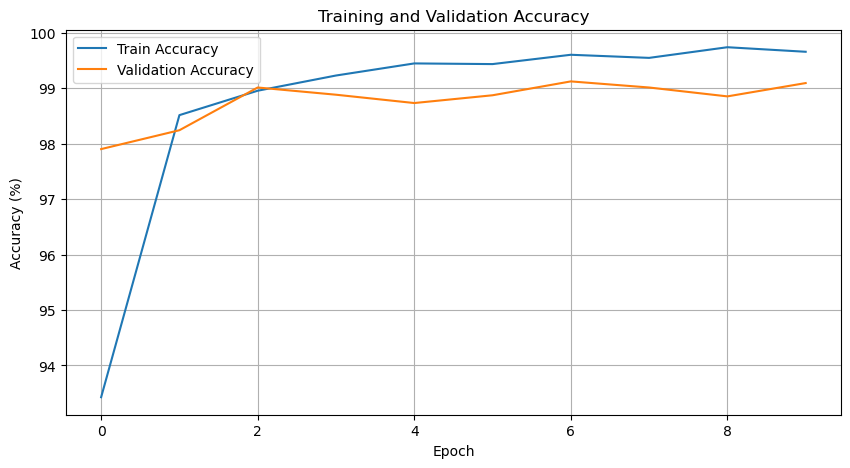

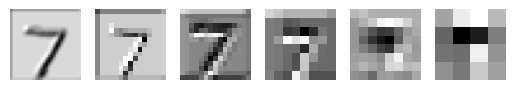

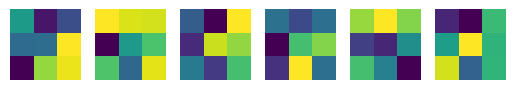

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader, random_split
import matplotlib.pyplot as plt
import numpy as np

# Load and preprocess the MNIST dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])

train_dataset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transform)
test_dataset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transform)

train_set, val_set = random_split(train_dataset, [50000, 10000])

train_loader = DataLoader(train_set, batch_size=128, shuffle=True)
val_loader = DataLoader(val_set, batch_size=128, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

# Define CNN architecture
class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(32, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.activation = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=1)
        self.pool_no_padding = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(128 * 4 * 4, 512)
        self.fc2 = nn.Linear(512, 10)
        
    def forward(self, x):
        x = self.activation(self.conv1(x))
        x = self.pool(x)
        x = self.activation(self.conv2(x))
        x = self.pool(x)
        x = self.activation(self.conv3(x))
        x = self.pool_no_padding(x)
        x = x.view(-1, 128 * 4 * 4)
        x = self.activation(self.fc1(x))
        x = self.fc2(x)
        return x

# Define training pipeline including validation after each epoch
def train_model(model, train_loader, val_loader, criterion, optimizer, epochs=10):
    train_loss, val_loss = [], []
    train_acc, val_acc = [], []

    for epoch in range(epochs):
        model.train()
        running_loss = 0.0  
        correct, total = 0, 0  

        for images, labels in train_loader:
            optimizer.zero_grad()  
            outputs = model(images)  
            loss = criterion(outputs, labels)  
            loss.backward()  
            optimizer.step()  

            running_loss += loss.item()  
            _, predicted = torch.max(outputs.data, 1)  
            total += labels.size(0)  
            correct += (predicted == labels).sum().item()  

        train_loss.append(running_loss / len(train_loader))  
        train_acc.append(100 * correct / total)  

        model.eval()  
        val_running_loss = 0.0  
        val_correct, val_total = 0, 0  
        
        with torch.no_grad():
            for images, labels in val_loader:
                outputs = model(images)  
                loss = criterion(outputs, labels)  
                val_running_loss += loss.item()  
                _, predicted = torch.max(outputs.data, 1)  
                val_total += labels.size(0)  
                val_correct += (predicted == labels).sum().item()  

        val_loss.append(val_running_loss / len(val_loader))
        val_acc.append(100 * val_correct / val_total)  
        
        print(f'Epoch [{epoch+1}/{epochs}], Train Loss: {running_loss / len(train_loader):.4f}, '
              f'Validation Loss: {val_running_loss / len(val_loader):.4f}, '
              f'Train Acc: {100 * correct / total:.2f}%, Val Acc: {100 * val_correct / val_total:.2f}%')
        
    return train_loss, val_loss, train_acc, val_acc  

# Create model
model = CNN()

# Set loss function
criterion = nn.CrossEntropyLoss()

# Set training algorithm
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Train model
train_loss, val_loss, train_acc, val_acc = train_model(model, train_loader, val_loader, criterion, optimizer)

# Evaluate the model on test set
model.eval()
test_correct, test_total = 0, 0
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        test_total += labels.size(0)
        test_correct += (predicted == labels).sum().item()

test_acc = 100 * test_correct / test_total
print(f'Test Accuracy: {test_acc:.2f}%')

# Plot training and validation accuracy
plt.figure(figsize=(10, 5))
plt.plot(train_acc, label='Train Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy (%)')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.grid()
plt.savefig('new_accuracy_plot.png')
plt.show()

# Function to visualize the feature maps produced by different layers for a given image
def plot_mapped_features(model, image, layers):
    x = image.unsqueeze(0)
    fig, axes = plt.subplots(1, len(layers))
    for i, layer in enumerate(layers):
        x = layer(x)
        axes[i].imshow(x[0, 0].detach().cpu().numpy(), cmap='gray')
        axes[i].axis('off')
    plt.show()
    
# Function to visualize the filters of a given convolutional layer
def plot_filters(layer, n_filters=6):
    filters = layer.weight.data.clone()
    filters = filters - filters.min()
    filters = filters / filters.max()
    filters = filters[:n_filters]
    fig, axes = plt.subplots(1, n_filters)
    for i, filter in enumerate(filters):
        axes[i].imshow(np.transpose(filter, (1, 2, 0)))
        axes[i].axis('off')
    plt.show()

examples = iter(test_loader)
example_data, example_labels = next(examples)
example_image = example_data[0]
layers = [model.conv1, model.pool, model.conv2, model.pool, model.conv3, model.pool_no_padding]
plot_mapped_features(model, example_image, layers)

plot_filters(model.conv1, n_filters=6)



In [3]:
import time

# Set the number of optimal epochs
k = 9  #highest accuracy for the epochs

# Initialize the new CNN model again for fresh training
model = CNN()

# Set loss function and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# Time the training process
start_time = time.time()

# Train the model with optimal number of epochs
train_loss, val_loss, train_acc, val_acc = train_model(model, train_loader, val_loader, criterion, optimizer, epochs=k)

# Calculate training time
training_time = time.time() - start_time
print(f'Training Time for {k} epochs: {training_time:.2f} seconds')

# Evaluate the model on test set
model.eval()
test_correct, test_total = 0, 0
with torch.no_grad():
    for images, labels in test_loader:
        outputs = model(images)
        _, predicted = torch.max(outputs.data, 1)
        test_total += labels.size(0)
        test_correct += (predicted == labels).sum().item()

test_acc = 100 * test_correct / test_total
print(f'Test Accuracy: {test_acc:.2f}%')


Epoch [1/9], Train Loss: 0.2222, Validation Loss: 0.0631, Train Acc: 92.91%, Val Acc: 98.11%
Epoch [2/9], Train Loss: 0.0484, Validation Loss: 0.0428, Train Acc: 98.44%, Val Acc: 98.70%
Epoch [3/9], Train Loss: 0.0318, Validation Loss: 0.0370, Train Acc: 98.98%, Val Acc: 98.89%
Epoch [4/9], Train Loss: 0.0259, Validation Loss: 0.0426, Train Acc: 99.13%, Val Acc: 98.67%
Epoch [5/9], Train Loss: 0.0199, Validation Loss: 0.0452, Train Acc: 99.31%, Val Acc: 98.57%
Epoch [6/9], Train Loss: 0.0156, Validation Loss: 0.0398, Train Acc: 99.47%, Val Acc: 98.96%
Epoch [7/9], Train Loss: 0.0122, Validation Loss: 0.0293, Train Acc: 99.60%, Val Acc: 99.22%
Epoch [8/9], Train Loss: 0.0096, Validation Loss: 0.0414, Train Acc: 99.69%, Val Acc: 98.72%
Epoch [9/9], Train Loss: 0.0103, Validation Loss: 0.0671, Train Acc: 99.65%, Val Acc: 98.39%
Training Time for 9 epochs: 2456.30 seconds
Test Accuracy: 98.71%


The training time, compared to the sample code in the example has increased by almost 200x. With the added layers this has become very expensive to run. However, the accuracy has increased almost 10% from the example at values that are around 99% as opposed to 90% in the sample. I ran this for k = 9 becuase the accuracy seemed the highest. 

PART 4: validation set to identify the best c in the first convolutional layer

In [10]:
# Update the CNN class to accept num_channels as an argument
class CNN(nn.Module):
    def __init__(self, num_channels=32):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, num_channels, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(num_channels, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.activation = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=1)
        self.pool_no_padding = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(128 * 4 * 4, 512)
        self.fc2 = nn.Linear(512, 10)
        
    def forward(self, x):
        x = self.activation(self.conv1(x))
        x = self.pool(x)
        x = self.activation(self.conv2(x))
        x = self.pool(x)
        x = self.activation(self.conv3(x))
        x = self.pool_no_padding(x)
        x = x.view(-1, 128 * 4 * 4)
        x = self.activation(self.fc1(x))
        x = self.fc2(x)
        return x

# Function to create and train the model with a variable number of channels in the first conv layer
def create_and_train_model(num_channels, train_loader, val_loader, epochs=10):
    model = CNN(num_channels)
    criterion = nn.CrossEntropyLoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)
    _, _, _, val_acc = train_model(model, train_loader, val_loader, criterion, optimizer, epochs)
    return val_acc[-1]  # Return the validation accuracy of the last epoch

#changed epochs to be 5 because it was taking too long for my computer to run and it was crashing
# Validation set approach to identify the best number of channels
best_val_acc = 0
best_num_channels = 0
for c in range(2, 16):  # c in {2, ..., 15}
    val_acc = create_and_train_model(c, train_loader, val_loader, epochs=5)
    if val_acc > best_val_acc:
        best_val_acc = val_acc
        best_num_channels = c

print(f'Best number of channels in the first conv layer: {best_num_channels}')

# Update the CNN class to use the best number of channels
class CNNBestChannels(nn.Module):
    def __init__(self, num_channels):
        super(CNNBestChannels, self).__init__()
        self.conv1 = nn.Conv2d(1, num_channels, kernel_size=3, padding=1)
        self.conv2 = nn.Conv2d(num_channels, 64, kernel_size=3, padding=1)
        self.conv3 = nn.Conv2d(64, 128, kernel_size=3, padding=1)
        self.activation = nn.ReLU()
        self.pool = nn.MaxPool2d(kernel_size=2, stride=2, padding=1)
        self.pool_no_padding = nn.MaxPool2d(kernel_size=2, stride=2, padding=0)
        self.fc1 = nn.Linear(128 * 4 * 4, 512)
        self.fc2 = nn.Linear(512, 10)
    
    def forward(self, x):
        x = self.activation(self.conv1(x))
        x = self.pool(x)
        x = self.activation(self.conv2(x))
        x = self.pool(x)
        x = self.activation(self.conv3(x))
        x = self.pool_no_padding(x)
        x = x.view(-1, 128 * 4 * 4)
        x = self.activation(self.fc1(x))
        x = self.fc2(x)
        return x

# Initialize the model with the best number of channels
model = CNNBestChannels(best_num_channels)


Epoch [1/5], Train Loss: 0.3077, Validation Loss: 0.0932, Train Acc: 90.55%, Val Acc: 97.16%
Epoch [2/5], Train Loss: 0.0708, Validation Loss: 0.0672, Train Acc: 97.84%, Val Acc: 97.94%
Epoch [3/5], Train Loss: 0.0469, Validation Loss: 0.0514, Train Acc: 98.50%, Val Acc: 98.44%
Epoch [4/5], Train Loss: 0.0353, Validation Loss: 0.0510, Train Acc: 98.88%, Val Acc: 98.44%
Epoch [5/5], Train Loss: 0.0308, Validation Loss: 0.0460, Train Acc: 99.02%, Val Acc: 98.59%
Epoch [1/5], Train Loss: 0.2197, Validation Loss: 0.0827, Train Acc: 93.16%, Val Acc: 97.42%
Epoch [2/5], Train Loss: 0.0550, Validation Loss: 0.0592, Train Acc: 98.22%, Val Acc: 98.32%
Epoch [3/5], Train Loss: 0.0367, Validation Loss: 0.0449, Train Acc: 98.82%, Val Acc: 98.61%
Epoch [4/5], Train Loss: 0.0286, Validation Loss: 0.0453, Train Acc: 99.08%, Val Acc: 98.74%
Epoch [5/5], Train Loss: 0.0213, Validation Loss: 0.0399, Train Acc: 99.32%, Val Acc: 98.85%
Epoch [1/5], Train Loss: 0.3010, Validation Loss: 0.0926, Train Acc: 9

KeyboardInterrupt: 

In [ ]:
# Function to visualize the feature maps produced by different layers for a given image
def plot_mapped_features(model, image, layers):
    x = image.unsqueeze(0)
    fig, axes = plt.subplots(1, len(layers))
    for i, layer in enumerate(layers):
        x = layer(x)
        axes[i].imshow(x[0, 0].detach().cpu().numpy(), cmap='gray')
        axes[i].axis('off')
    plt.show()

# Example usage
examples = iter(test_loader)
example_data, example_labels = next(examples)
example_image = example_data[0]
layers = [model.conv1, model.pool, model.conv2, model.pool, model.conv3, model.pool_no_padding]
plot_mapped_features(model, example_image, layers)

def plot_mapped_features_all_channels(model, image, layers):
    x = image.unsqueeze(0)
    for i, layer in enumerate(layers):
        x = layer(x)
        fig, axes = plt.subplots(1, x.size(1))
        for j in range(x.size(1)):
            axes[j].imshow(x[0, j].detach().cpu().numpy(), cmap='gray')
            axes[j].axis('off')
        plt.show()

plot_mapped_features_all_channels(model, example_image, layers)


In [7]:
# Function to visualize the feature maps produced by different layers for a given image
def plot_mapped_features(model, image, layers):
    '''Example usage: 
    
    >>> examples = iter(test_loader)
    >>> example_data, example_labels = next(examples) # get one batch from test set
    >>> example_image = example_data[0]
    >>> layers = [model.conv1, model.pool, model.conv2, model.pool]
    >>> plot_mapped_features(model, example_image, layers)
    
    '''
    # Add a batch dimension to the image tensor (from (channels, height, width) to (1, channels, height, width))
    x = image.unsqueeze(0)
    # Create a subplot with 1 row and len(layers) columns
    fig, axes = plt.subplots(1, len(layers))
    # Iterate over the specified layers
    for i, layer in enumerate(layers):
        # Pass the image through the current layer
        x = layer(x)
        # Detach the feature map from the computation graph and move it to CPU, then convert it to a NumPy array
        # Visualize the first channel of the feature map
        axes[i].imshow(x[0, 0].detach().cpu().numpy(), cmap='gray')
        # Turn off the axis for a cleaner look
        axes[i].axis('off')
    # Display the feature maps
    plt.show()
    
# Function to visualize the filters of a given convolutional layer
def plot_filters(layer, n_filters=6):
    '''Example usage: 

    >>> layer = model.conv1
    >>> plot_filters(layer, n_filters=6)
    
    '''
    # Clone the weights of the convolutional layer to avoid modifying the original weights
    filters = layer.weight.data.clone()
    # Normalize the filter values to the range [0, 1] for better visualization
    filters = filters - filters.min()
    filters = filters / filters.max()
    # Select the first n_filters to visualize
    filters = filters[:n_filters]
    # Create a subplot with 1 row and n_filters columns
    fig, axes = plt.subplots(1, n_filters)
    # Iterate over the selected filters
    for i, filter in enumerate(filters):
        # Transpose the filter dimensions to (height, width, channels) for visualization
        axes[i].imshow(np.transpose(filter, (1, 2, 0)))
        # Turn off the axis for a cleaner look
        axes[i].axis('off')
    # Display the filters
    plt.show()